<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

<div class="alert alert-info">
    
Привет, Вера!
    Спасибо за ревью, надеюсь, я правильно поняла твои замечания и все исправила.

# Оценка результатов A/B-теста

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Оценка-корректности-проведения-теста" data-toc-modified-id="Оценка-корректности-проведения-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценка корректности проведения теста</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Оценка-результатов-A/B-тестирования" data-toc-modified-id="Оценка-результатов-A/B-тестирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка результатов A/B-тестирования</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Техническое задание

Название теста: `recommender_system_test;`

- Группы: А (контрольная), B (новая платёжная воронка);
- Дата запуска: 2020-12-07;
- Дата остановки набора новых пользователей: 2020-12-21;
- Дата остановки: 2021-01-04;
- Аудитория: 15% новых пользователей из региона EU;
    
Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
    
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
  - конверсии в просмотр карточек товаров — событие `product_page`
  - просмотры корзины — `product_cart`
  - покупки — `purchase`
    
Загрузить данные теста, проверить корректность его проведения и проанализировать полученные результаты.

**Данные**

`/datasets/ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год;

Структура файла:
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.
***
`/datasets/final_ab_new_users.csv` — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;

Структура файла:
- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.
***
`/datasets/final_ab_events.csv` — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;

Структура файла:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.
***
`/datasets/final_ab_participants.csv` — таблица участников тестов.

Структура файла:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя

## Предобработка данных

Требуется ли преобразование типов?
Присутствуют ли пропущенные значения и дубликаты? Если да, то какова их природа?

In [80]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import math as mth

In [81]:
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')

In [82]:
marketing_events.info()
print(f'Дубликатов в датафрейме: {marketing_events.duplicated().sum()}')
marketing_events.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
Дубликатов в датафрейме: 0


,name,regions,start_dt,finish_dt
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
4,4th of July Promo,N.America,2020-07-04,2020-07-11
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Файл содержит 14 строк и 4 столбца, без пропусков и без дубликатов. Столбцы с датами следует привести к нужному формату.

In [83]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [84]:
new_users.info()
print(f'Дубликатов в датафрейме: {new_users.duplicated().sum()}')
new_users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
Дубликатов в датафрейме: 0


,user_id,first_date,region,device
8521,269FE2277D95F783,2020-12-14,EU,Android
7428,FA171C4FAFCC8053,2020-12-14,EU,PC
4835,7322F24CA1F72FA6,2020-12-07,EU,PC
19516,0B719E7F792B4C7C,2020-12-08,EU,Mac
53995,7DC90FCAFC6ACA5C,2020-12-13,EU,Android


Файл содержит 4 столба и 61 733 записи, без пропусков и дубликатов. Следует привести к нужному типу столбец с датой.

In [85]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [86]:
events.info()
print(f'Дубликатов в датафрейме: {events.duplicated().sum()}')
events.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
Дубликатов в датафрейме: 0


,user_id,event_dt,event_name,details
355861,6169C0F274847C93,2020-12-20 03:38:50,login,NaN
338664,08589AA89496453B,2020-12-18 09:35:57,login,NaN
366594,890CBA9D0B59247E,2020-12-21 06:10:28,login,NaN
229400,CFC46A8D5972591B,2020-12-24 09:00:06,product_page,NaN
387043,EF1D60EB62862721,2020-12-22 13:32:46,login,NaN


Файл на 4 столбца и 440 317 строк, 377 577 пропусков в колонке details, дубликатов нет. Необходимо заменить тип данных в колоне с датой.

In [87]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

Посмотрим на пропуски, возможно, они связаны с типом события.

In [88]:
events.query('event_name != "purchase"').isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

Так и есть, пропуски во всех событиях, кроме события покупки. Это связано с тем, что для других событий нет деталей, это нормально и никак нам не мешает, оставляем как есть.

In [89]:
participants.info()
print(f'Дубликатов в датафрейме: {participants.duplicated().sum()}')
participants.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
Дубликатов в датафрейме: 0


,user_id,group,ab_test
1678,DB6EC7ECB0CEDCC4,A,recommender_system_test
9735,94700AA1207EF8EA,A,interface_eu_test
17425,3E57F488B40A51D6,A,interface_eu_test
2394,89EF9F0C1676188A,B,recommender_system_test
15307,BADD0646825F4DB5,A,interface_eu_test


3 столбца 18 268 строк, без пропусков и дубликатов.

***
**Вывод**

Представленые данные были изучены на наличие дубликатов (не обнаружено) и пропусков (обнаружены пропуски в details в датасете с событиями). Пропуски были признаны некритичными и остались без изменений. Столбцы с датами были переведены в соответсвующий формат.

<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

Хорошо, данные достаточно чистые, посмотрим что там с корректностью проведения теста 
</div>

## Оценка корректности проведения теста

Проверим, не пересекается ли время проведения теста с маркетинговыми активностями.

In [90]:
cross_events = marketing_events.query(
    '("2021-01-04" >= start_dt >= "2020-12-07") |' 
    '("2021-01-04" >= finish_dt >= "2020-12-07") |' 
    '("2020-12-07" > start_dt & finish_dt > "2020-12-07")')
cross_events[cross_events['regions'].str.contains("EU")]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Время проведения теста выпадает на одну маркетинговую кампанию.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Не совсем точная проверка. Чтобы маркетинговое слбытие повлияло на нас нужночтобы

    - дата начала события попадало на тест ИЛИ
    - дата окончания теста попадало на тест ИЛИ
    - дата нача была до И дата окончания была после И
    - регион проведения акции был EU
</div>

<div class="alert alert-info">
    
   - дата начала события попадало на тест - это условие есть `2021-01-04" >= start_dt >= "2020-12-07"`
   - ИЛИ - `|`
   - дата окончания теста (события?) попадало на тест - добавила `"2021-01-04" >= finish_dt >= "2020-12-07"`
   - ИЛИ - `|`
   - дата нача была до И дата окончания была после - добавила `"2020-12-07" > start_dt & finish_dt > "2020-12-07"`
   - И регион проведения акции был EU - добавила поиск подстроки в отфильтрованной по времени таблице с маркетинговыми событиями
</div>

<div class="alert alert-success">

**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [91]:
#recommender_system_test = participants.query('ab_test == "recommender_system_test"')
#print(f"Дубликатов: {recommender_system_test['user_id'].duplicated().sum()}")
#recommender_system_test = recommender_system_test.merge(new_users, on='user_id', how='left')
#recommender_system_test = recommender_system_test.merge(events, on='user_id', how='left')
#recommender_system_test = recommender_system_test.query('"2020-12-07" <= first_date <= "2020-12-21"')
#users_another_tests = list(participants.query('ab_test != "recommender_system_test"')['user_id'])
#recommender_system_test = recommender_system_test.query('user_id not in @users_another_tests and region == "EU"')

Соберем участников нашего теста в отедльную таблицу, отфильтруем дату регистрации участников теста по условиям технического задания, уберем участников, встречающихся в других тестах и из других регионов.

In [92]:
tests_users = participants.merge(new_users, on='user_id', how='left').merge(events, on='user_id', how='left')
# таблица участников тестов с событиями

In [93]:
print('Доля пользователей из Европы, участвующих в тесте', round(
    tests_users.query('ab_test == "recommender_system_test" & region == "EU"')['user_id'].nunique()
 /new_users.query('region == "EU"')['user_id'].nunique()*100), '%')

print('Количество участников теста' , 
      tests_users.query('ab_test == "recommender_system_test"')['user_id'].nunique())

Доля пользователей из Европы, участвующих в тесте 14 %
Количество участников теста 6701


<div class="alert alert-success">

**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [96]:
users_another_tests = tests_users.query(
    'ab_test != "recommender_system_test"')
# участники другого теста
recommender_system_test = tests_users.query(
    ' region == "EU" & ab_test == "recommender_system_test"') 
# фильтруем по региону и названию нашего теста в отдельную таблицу

In [98]:
many_tests_users = np.intersect1d(users_another_tests['user_id'].unique(), 
                                recommender_system_test['user_id'].unique())
print(f'Пользователей, участвующих в двух тестах одновременно: {len(many_tests_users)}')

Пользователей, участвующих в двух тестах одновременно: 1602


In [99]:
recommender_system_test = recommender_system_test.query('user_id not in @many_tests_users')
# убираем пользователей, участвующих в других тестах

Поищем пользователей, у которых нет ни одного события за 14 дней с момента регистрации.

In [100]:
recommender_system_test['deadline_dt'] = recommender_system_test['first_date'] + timedelta(days=14) 
# колонка с дедлайном по первому событию

In [101]:
first_event = recommender_system_test.pivot_table(
    index='user_id', values='event_dt', aggfunc='first').reset_index()
first_event = first_event.rename(columns={'event_dt':'first_event'})
first_event['first_event'] = first_event['first_event'].dt.date
# таблица первых событий каждого пользователя

In [102]:
recommender_system_test.dropna(subset=['event_name'], inplace = True) # удалили пользователей без событий

In [103]:
recommender_system_test = recommender_system_test.merge(first_event, on='user_id', how='left')

In [104]:
recommender_system_test.query('first_event > deadline_dt')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,deadline_dt,first_event


Пусто, все участники совершили хотя бы одно событие в течение 14 дней с момента регистрации.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь нужно проверить  нет ли у нас пользователй, которые участвовали в двух тестах одновременно
    
</div>

<div class="alert alert-info">
    
Но нам неизвестны даты проведения другого теста, как мы узнаем, одновременно пользователь участвует или нет? Или я не правильно понимаю задачу?
    
Сделала выборку из юзеров, совершивших событие в даты нашего теста, но имеющих запись об участии в другом тесте
    
    
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Нет не нужно смотреть даты. У нас в таблице final_ab_participants указаны идентификаторы пользователей и названия тестов. Нужно проверить, что одни и те же пользователи не участвовали в двух разных тестах
</div>

<div class="alert alert-info">

Ок, сделала проверку по пересечению идентификаторов, 1602 пользователя получилось

<div class="alert alert-success">

**Комментарий ревьюера - 3**

**#ок**

+

</div>

Проверим аудиторию теста, согласно техническому заданию ожидается 15% новых пользователей из Европы, что составляет 6000 человек.

In [105]:
print('Доля пользователей из Европы, участвующих в тесте' ,round(recommender_system_test['user_id'].nunique()
 /new_users.query('region == "EU"')['user_id'].nunique()*100), '%')

print('Количество участников теста' ,(recommender_system_test['user_id'].nunique()))

Доля пользователей из Европы, участвующих в тесте 6 %
Количество участников теста 2594


<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

Да, вообще отличается от заявленных 15%...
</div>

Посмотрим на равномерность распределения пользователей.

In [106]:
(recommender_system_test.groupby('group')['user_id'].nunique()/recommender_system_test['user_id'].nunique()*100).round(2)

group
A    74.75
B    25.25
Name: user_id, dtype: float64

25% из группы В и 75% из группы А, есть большой перекос.

***
**Вывод**

В результате проверки данных тестирования они были очищенны от пользователей, участвующих параллельно в других тестах, не подходящих по дате регистрации, региону и не совершивших ни одного действия в период проведения теста.

Согласно техническому заданию в тесте должны были принять участие 15% новых пользователей из Европы или 6000 человек.
Изначально в тесте принял участие 6701 пользователь, что составило 14% от новых пользователей из Европы. После очистки данных аудитория теста насчитывает всего 6% (2594 человек). При этом есть большой дисбаланс в группах теста - 25/75.

Также время проведения теста выпадает на одну маркетинговую активность, предновогодние дни и сам праздник нового года, в новогодние праздники покупательская активность сильно меняется. Все гипотезы, которые мы можем подтвердить в результате анализа А/В-тестирования, могут показать совершенно другие результаты когда покупательское поведение будет другое.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Ты несколько раз написала про 6000 пользователей, а сколько у нас всего пользователей в тесте?

Реальный участник теста - это пользователь, который совершит действие в период 14 дней после регистрации
</div>

<div class="alert alert-info">

Ты несколько раз написала про 6000 пользователей, а сколько у нас всего пользователей в тесте? - Если вопрос в том, сколько изначально было пользователей до очистки, то добавила эту информацию.

Реальный участник теста - это пользователь, который совершит действие в период 14 дней после регистрации - сделала дополнительную проверку, но ни одного пользователя с первым событием после 14 дней с регистрации не нашла.
</div>

<div class="alert alert-success">

**Комментарий ревьюера - 2**

**#ок**

Да, реальная аудитория теста 2594 - это намного меньше заявленных 6000
</div>

## Исследовательский анализ данных

Опишем последовательность событий для продуктовой воронки:

In [107]:
recommender_system_test['event_name'].value_counts()

login           7906
product_page    4922
product_cart    2350
purchase        2348
Name: event_name, dtype: int64

Пользователь 
- заходит в систему
- переходит на страницу товара
- переходит в корзину
- совершает оплату

Сразу отметим, что практически каждый переход в корзину заканчивается оплатой.

Посмотрим на распределение количества событий на пользователя в выборках

In [108]:
groups = recommender_system_test.pivot_table(index = ['event_name', 'group'],
values = 'user_id', aggfunc = 'count')

groups['mean'] = round(groups['user_id']/recommender_system_test.groupby(
    'group')['user_id'].nunique(), 2)
groups.reset_index(inplace=True)
groups.sort_values(by='mean', ascending=False, inplace=True)

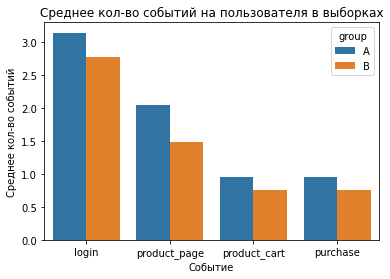

In [109]:
ax = sns.barplot(x='event_name', y='mean', data=groups, hue='group')
ax.set_title('Среднее кол-во событий на пользователя в выборках')
ax.set_xlabel('Событие') 
ax.set_ylabel('Среднее кол-во событий')
plt.show()

В группе А больше событий на пользователя по всем событиям. При этом события 'корзина' и 'покупка' в группе А распределены одинаково, а в группе В событие 'покупка' происходит чуть реже, чем 'корзина'. Посмотрим на график распределения.

In [110]:
group_a = recommender_system_test.query('group=="A"')
group_b = recommender_system_test.query('group=="B"')

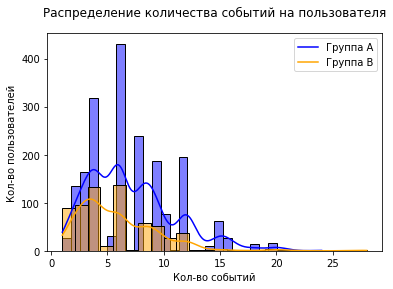

In [111]:
sns.histplot(group_a.groupby('user_id')['event_name'].count(), kde=True, color='blue')
sns.histplot(group_b.groupby('user_id')['event_name'].count(), kde=True, color='orange')
plt.title(f"Распределение количества событий на пользователя", y=1.05)
plt.legend({'Группа А', 'Группа В'})
plt.xlabel('Кол-во событий')
plt.ylabel('Кол-во пользователей')
plt.show()

На графике видим, что распределение количества событий на пользователя имеет схожие черты, но не одинаково. В группе А пик на 6 событиях и затем спад, а у группы В спад начинается после 4 событий.

Посмотрим на распределние количества событий по датам.

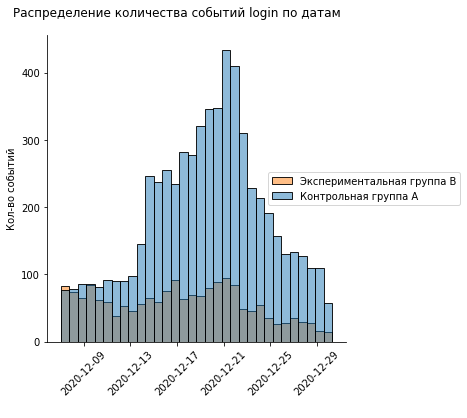

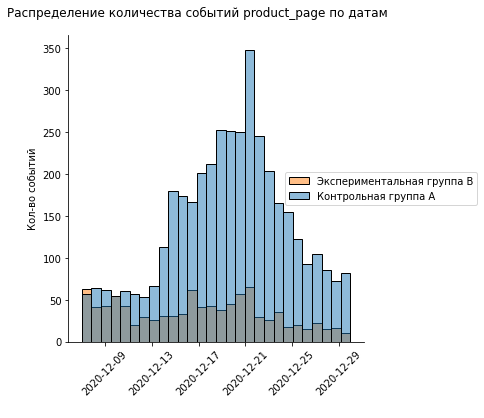

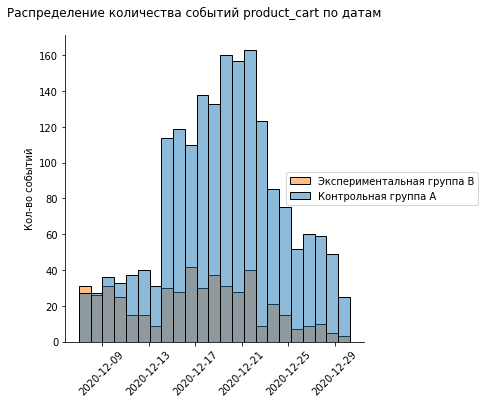

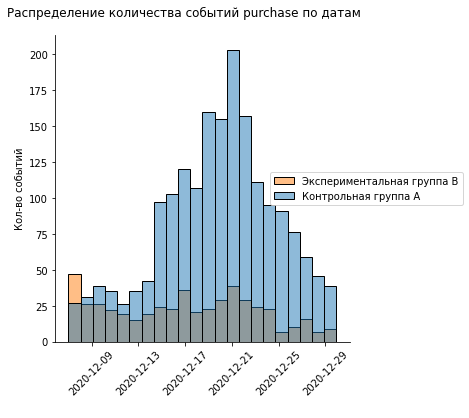

In [112]:
for event in recommender_system_test['event_name'].value_counts().index:
    g = sns.displot(
        recommender_system_test, 
        x=recommender_system_test.query('event_name == @event')['event_dt'], 
        hue='group', 
        legend=False)
    plt.suptitle(f"Распределение количества событий {event} по датам", y=1.05)
    g.set_axis_labels(' ', 'Кол-во событий')
    plt.legend({'Экспериментальная группа В', 'Контрольная группа А'}, loc='right', bbox_to_anchor=(1.4, 0.5))
    plt.xticks(rotation=45)
    plt.show()

Если в начале теста по всем событиям группа B вырывалась вперед или хотя бы была на уровне группы А по количеству, то после 10 декабря начала сдавать позиции. У группы А можно наблюдать всплеск активности в период с 13 декабря по 22, затем идет спад. У группы В за этот же период активность практически не меняется, после 22 декабря можно тоже заметить спад. После 30 декабря вообще не зафиксировано ни одного события ни для одной из групп.

<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

первые два вопроса отлично проанализированы
</div>

Построим продуктовую воронку и посмотрим на конверсию

In [113]:
funnel_a = (
    recommender_system_test.query('group == "A"').groupby('event_name').agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False).reset_index()
)
funnel_b = (
    recommender_system_test.query('group == "B"').groupby('event_name').agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False).reset_index()
)
d = {2: 3, 3: 2}
funnel_a = funnel_a.rename(d).sort_index()
funnel_b = funnel_b.rename(d).sort_index()

In [114]:
fig = go.Figure()
fig.update_layout(title_text='Воронка по группам А/В-теста')
fig.add_trace(go.Funnel(
    name = 'Группа А',
    y = funnel_a['event_name'],
    x = funnel_a['user_id'].values,
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Группа В',
    orientation = "h",
    y = funnel_b['event_name'],
    x = funnel_b['user_id'].values,
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

В группе В конверсия упала в переходе к событию 'product_page' (56% против 65% в группе А), конверсия перехода со страницы товара в корзину выросла на 3% в группе В.  Событие 'purchase' практически не изменилось, при этом 4% пользователей в обеих группах пропускают переход в корзину и совершают покупку сразу со страницы товара.

В целом, ни о каких 10% увеличения конверсии не может быть и речи.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

А вот воронка не верно построена. Воронку нужно строить по количеству уникальных пользователей, а не по событиям
</div>

<div class="alert alert-info">
    
Исправила

</div>

<div class="alert alert-success">

**Комментарий ревьюера - 2**

**#ок**

+

</div>

***
**Вывод:**
    
Количество событий на пользователя одинаково распределены в выборках? 
- Выборки обладают разными средними количества событий на пользователя. Распределение количества событий на пользователя имеет схожие черты, но не одинаково.

Как число событий в выборках распределено по дням?
- Число событий по дням в выборках заметно отличается, у группы А можно наблюдать всплеск активности в период с 13 декабря по 22, у группы В за этот же период активность практически не меняется, после 22 декабря в обеих выбрках наблюдается спад. После 30 декабря вообще не зафиксировано ни одного события ни для одной из групп.

Как меняется конверсия в воронке в выборках на разных этапах?
- В группе В конверсия упала на 9% в переходе к событию 'product_page' (56% против 65% в группе А), конверсия перехода со страницы товара в корзину выросла на 3% в группе В. Событие 'purchase' практически не изменилось, при этом 4% пользователей в обеих группах пропускают переход в корзину и совершают покупку сразу со страницы товара.

Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?
- нарушены условия технического задания:
    - дата остановки: 2021-01-04 - фактически сбор данных о событиях осуществлялся до 2020-12-30 включительно, с учетом того, что согласно тесту лайфтайм нового пользователя должен быть 14 дней, набор новых пользователей должен был быть остановлен 2020-12-16
    - аудитория: 15% новых пользователей из региона EU - по факту 6%
    - ожидаемое количество участников теста: 6000 - по факту 2594
- распределение участников в группах 75/25 - большой перекос
- в выборках присутсвуют пользователи с лайфтаймом менее 14 дней

В целом ожидаемый эффект не достигнут: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
   - конверсии в просмотр карточек товаров — событие `product_page` - упала на 9%
   - просмотры корзины — `product_cart` - выросла на 3%
   - покупки — `purchase` - не изменилась

## Оценка результатов A/B-тестирования

Проведенный A/B-тест и полученные результаты нельзя назвать удовлетворительными. Допущено слишком много нарушений технического залания и принципов проведения A/B-тестирования.

In [115]:
wrong_users = np.intersect1d(recommender_system_test.query('group == "A"')['user_id'].unique(), 
                                recommender_system_test.query('group == "B"')['user_id'].unique())
print(f'Пересечений пользователей в выборках: {len(wrong_users)}')

Пересечений пользователей в выборках: 0


<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

+

</div>

Есть 1 контрольная группа и одна экпериментальнная. Проверим, находят ли статистические критерии разницу между выборками:

- проверку будем осуществлять через z-test
- уровень alpha выберем 0.05

Посчитаем число пользователей, совершивших событие в каждой из групп.

In [116]:
clear_events_groups = recommender_system_test.pivot_table(index = 'event_name', columns = 'group',
values = 'user_id', aggfunc = 'nunique').sort_values(by='A', ascending=False)
clear_events_groups

group,A,B
event_name,,
login,1939,655
product_page,1265,367
purchase,613,191
product_cart,589,184


<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

Вот видишь как мало на самом деле пользователей.
</div>

Посчитаем долю пользователей, совершивших событие.

In [117]:
round(clear_events_groups/recommender_system_test.groupby('group')['user_id'].nunique()*100, 2)

group,A,B
event_name,,
login,100.00,100.00
product_page,65.24,56.03
purchase,31.61,29.16
product_cart,30.38,28.09


In [118]:
clear_events_groups = clear_events_groups.reset_index()

Проверим статистическую разницу долей z-критерием

In [119]:
def z_test(event, group_a, group_b, alpha):
    
    alpha = alpha

    # пропорция успехов в первой группе:
    p1 = clear_events_groups.query("event_name==@event")[group_a]/recommender_system_test.groupby('group')['user_id'].nunique()[group_a]
    
    # пропорция успехов во второй группе:
    p2 = clear_events_groups.query("event_name==@event")[group_b]/recommender_system_test.groupby('group')['user_id'].nunique()[group_b]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (clear_events_groups.query("event_name==@event")[group_a] + clear_events_groups.query("event_name==@event")[group_b]) / (recommender_system_test.groupby('group')['user_id'].nunique()[group_a] + recommender_system_test.groupby('group')['user_id'].nunique()[group_b])
    
    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference/mth.sqrt(p_combined*(1-p_combined)*(1/recommender_system_test.groupby('group')['user_id'].nunique()[group_a]+1/recommender_system_test.groupby('group')['user_id'].nunique()[group_b]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    
    print(f'{event} p-значение: {p_value}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

In [120]:
for event in ['product_page', 'product_cart', 'purchase']:
    z_test(event, "A", "B", 0.05)

product_page p-значение: [2.45778881e-05]
Отвергаем нулевую гипотезу: между долями есть значимая разница
product_cart p-значение: [0.26899326]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
purchase p-значение: [0.24035836]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div class="alert alert-success">

**Комментарий ревьюера**

**#ок**

Гипотезы в целом проверены правильно. Здесь можно было учесть, что мы проверяем мног гипотез сразу и сделать поправку Бонферрони
</div>

Статистически значимую разницу удалось обнарежить только в событии `product_page`. В остальных событиях доли пользователей, совершивших это событие, не имеют значимой разницы.

***
**Вывод**

Была проверена статистическая разница долей в экспериментальной и контрольной выборках с помощью z-теста.
На текущих данных экперимент следует остановить, новая рекомендательная система не дает желаемого результата. Однако, стоит отметить, что есть основания сомневаться в корректности полученных результатов из-за ошибок, допущенных в проведенении теста.

## Выводы

Еще раз посмотрим на техническое задание и отметим, насколько ему соответсвуют данные теста `recommender_system_test`:

- Группы: А (контрольная), B (новая платёжная воронка) - полное соответствие
- Дата запуска: 2020-12-07 - полное соответствие
- Дата остановки набора новых пользователей: 2020-12-21 - полное соответствие
- Дата остановки: 2021-01-04 - фактически остановлен 2020-12-30
- Аудитория: 15% новых пользователей из региона EU - фактически 6%

- Ожидаемое количество участников теста: 6000 - фактически 2594
- Распределение участников в группах 75/25
- В выборках присутсвуют пользователи с лайфтаймом менее 14 дней

- Ожидаемый эффект не достигнут: за 14 дней с момента регистрации в системе пользователи не показали улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие product_page - падение на 12%
    - просмотры корзины — product_cart - прирост 4%
    - покупки — purchase - падение на 1%

В целом результаты проведения A/B-теста не следует принимать к дальнейшему анализу и делать какие-либо выводы, так как:

Время проведения теста было выбрано некорректно:
- совпадало с новогодними празниками и предшествующим покупательским ажиотажем
- пересекалось с маркетинговой активностью

Выборки были сформированы с нарушениями:
- несоблюден баланс
- несоблюдены требования тз в части количества участников
- фактически наблюдение остановлено раньше, чем планировалось

Рекомендации: провести A/B-тест заново, на результаты этого теста опираться нельзя при принятии решений о судьбе новой рекомендательной системы.
Если по каким-то причинам проведение нового теста невозможно, устранить все обнаруженные нарушения в текущих данных теста и провести оценку результатов.